# Clustering Part 2

* Data processing and normalization
* Using the elbow method to identify a good number of clusters
* Evaluation of clustering with Rand Index and Silhouette scoring
* Different clustering methods: hierarchical clustering, DBSCAN

Datasets: iris, abalone, winequality-red

In [1]:
#PID:12
import pandas, seaborn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

In [1]:
tips = pandas.read_csv("../Datasets/tips.csv")


# task: preprocess the data and cluster with kmeans

In [2]:
abalone = pandas.read_csv('../Datasets/abalone.csv')
abalone.sample()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
138,F,0.405,0.325,0.11,0.3555,0.151,0.063,0.117,9


In [3]:
abalone.describe().round(2).loc[['count','mean','min','max']]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,9.93
min,0.08,0.06,0.00,0.00,0.00,0.00,0.00,1.00
max,0.82,0.65,1.13,2.83,1.49,0.76,1.00,29.00


In [4]:
abalone.sample()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
330,M,0.5,0.38,0.155,0.5955,0.2135,0.161,0.2,12


In [5]:
import seaborn
import warnings
warnings.filterwarnings('ignore')

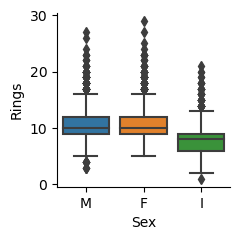

In [6]:
seaborn.catplot(data=abalone, x='Sex', y='Rings', kind='box', height=2.5)

In [7]:
abalone = pandas.read_csv('../Datasets/abalone.csv')

abalone = pandas.get_dummies(abalone, drop_first=True)


In [8]:
from sklearn.preprocessing import StandardScaler
std_abalone = pandas.DataFrame(
    StandardScaler().fit_transform(abalone),
    columns= abalone.columns
)


In [9]:
std_abalone.sample()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
388,-0.283082,0.12213,-0.347099,-0.448151,-0.542351,-0.338442,-0.135293,1.261349,-0.688018,1.316677


In [10]:
from sklearn.cluster import KMeans
len(std_abalone)

4177

### find the elbow!

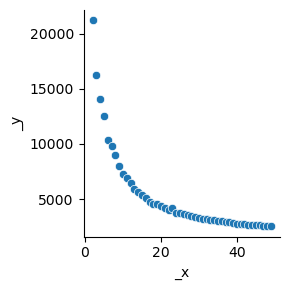

In [11]:
xs, ys = [], []
for k in range(2, 50):
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(std_abalone)
    inertia = model.inertia_
    xs.append(k)
    ys.append(inertia)

seaborn.relplot(x=xs, y=ys, height=3, kind='scatter')

The elbow is around 15, based on our visual analysis.

In [12]:
model = KMeans(n_clusters=15)
model.fit(std_abalone)
std_abalone['cluster'] = model.labels_

In [13]:
std_abalone.sample(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M,cluster
2294,0.008394,0.172519,-0.466653,-0.258483,-0.116554,-0.311070,-0.135293,0.640960,-0.688018,1.316677,5
2361,0.216591,0.424464,0.370226,-0.080032,-0.073749,-0.197020,0.080246,0.640960,-0.688018,1.316677,10
2488,-0.199803,-0.230593,0.131117,-0.137136,-0.510811,0.131444,-0.250247,1.261349,-0.688018,1.316677,5
2974,1.840528,1.684190,1.446213,2.152137,2.679293,1.417927,1.840481,0.640960,-0.688018,1.316677,4
715,-2.073577,-2.094986,-1.781749,-1.479089,-1.405211,-1.460693,-1.500373,-0.910013,1.453451,-0.759488,11


### How do we compare clusters?

+ Use relplot 
+ Pick two variables.
+ Color the clusters (hue)

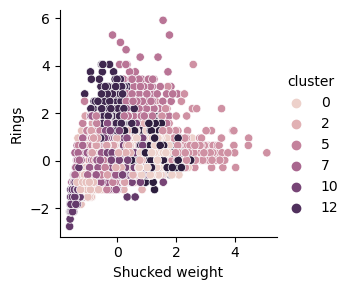

In [14]:
seaborn.relplot(data=std_abalone, x='Shucked weight', y='Rings', hue='cluster',
                height=3)

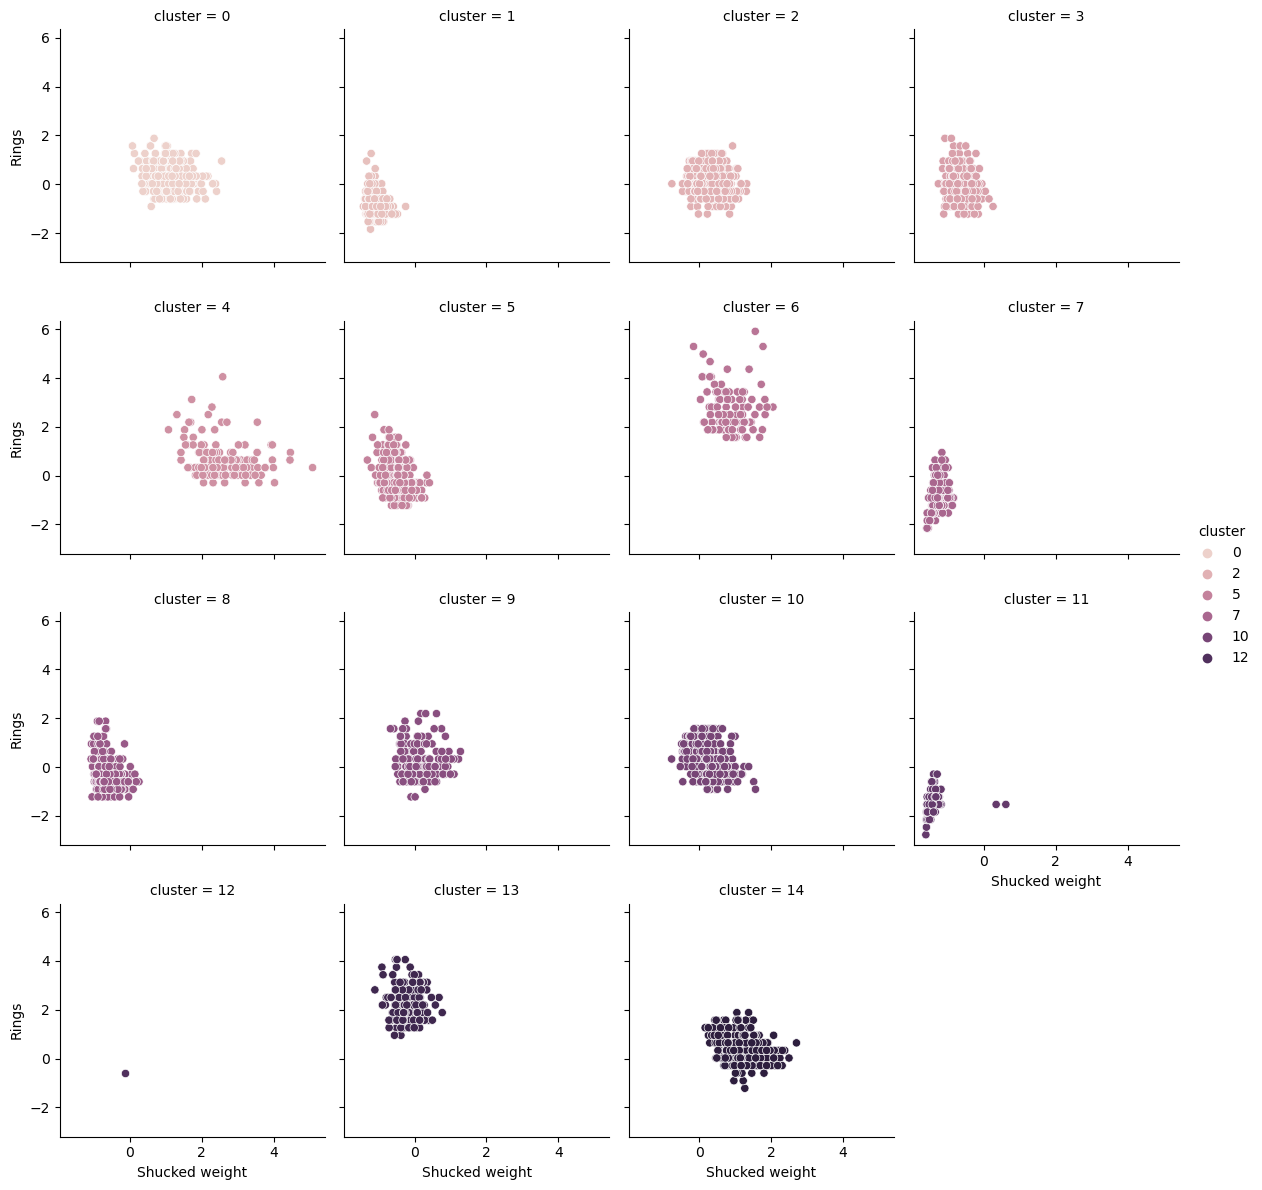

In [15]:
seaborn.relplot(data=std_abalone, x='Shucked weight', y='Rings', col='cluster', col_wrap=4,
                hue='cluster',
                height=3)